In [1]:
from xgboost import XGBClassifier, XGBRFRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000] # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
# eval_metric参数
# rmes: 均方根误差
# mae: 平均绝对值误差
# logloss: 负对数似然函数值
# mlogloss: 多分类logloss(多分类)
# error: 二分类错误率 
# merror: 多分类错误率(多分类)
# auc

xg1 = XGBClassifier(n_jobs=-1)
eval_set = [(X_train, y_train), (X_test, y_test)]
xg1.fit(X_train, y_train, 
        early_stopping_rounds=20, # mlogloss在20轮迭代之内，都没有提升的话，就stop
        eval_set=eval_set, # A list of (X, y) tuple pairs to use as validation sets, for which metrics will be computed. Validation metrics will help us track the performance of the model.
        eval_metric='mlogloss', verbose=5)

[0]	validation_0-mlogloss:1.35492	validation_1-mlogloss:1.41385
[5]	validation_0-mlogloss:0.55551	validation_1-mlogloss:0.71486
[10]	validation_0-mlogloss:0.34509	validation_1-mlogloss:0.54084
[15]	validation_0-mlogloss:0.24679	validation_1-mlogloss:0.47025
[20]	validation_0-mlogloss:0.18639	validation_1-mlogloss:0.43652
[25]	validation_0-mlogloss:0.15052	validation_1-mlogloss:0.41875
[30]	validation_0-mlogloss:0.12347	validation_1-mlogloss:0.40726
[35]	validation_0-mlogloss:0.10394	validation_1-mlogloss:0.40106
[40]	validation_0-mlogloss:0.08330	validation_1-mlogloss:0.39644
[45]	validation_0-mlogloss:0.06666	validation_1-mlogloss:0.39439
[50]	validation_0-mlogloss:0.05359	validation_1-mlogloss:0.39573
[55]	validation_0-mlogloss:0.04536	validation_1-mlogloss:0.39682
[60]	validation_0-mlogloss:0.03981	validation_1-mlogloss:0.39730
[64]	validation_0-mlogloss:0.03463	validation_1-mlogloss:0.39819


C:\Users\dcdmm\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [4]:
xg1.predict(X_test)

array([5, 2, 2, 5, 2, 4, 2, 5, 5, 2, 5, 1, 5, 3, 7, 2, 2, 6, 2, 5, 3, 3,
       3, 4, 4, 2, 2, 6, 1, 5, 5, 7, 2, 4, 5, 5, 3, 2, 2, 5, 2, 5, 1, 2,
       2, 2, 5, 2, 5, 1, 1, 2, 5, 5, 7, 5, 7, 5, 5, 2, 6, 7, 2, 2, 5, 6,
       6, 6, 5, 1, 1, 5, 6, 2, 2, 2, 1, 2, 5, 3, 6, 6, 2, 2, 2, 7, 5, 2,
       2, 2, 2, 1, 7, 3, 2, 5, 1, 5, 1, 4, 6, 2, 4, 3, 1, 6, 5, 2, 1, 2,
       1, 5, 6, 2, 5, 2, 1, 2, 7, 7, 2, 5, 6, 4, 5, 2, 5, 5, 5, 1, 2, 2,
       4, 1, 2, 6, 6, 4, 5, 1, 5, 5, 7, 2, 3, 5, 6, 1, 7, 2, 2, 5, 6, 5,
       7, 7, 5, 5, 5, 7, 5, 7, 5, 2, 5, 6, 2, 1, 7, 2, 5, 3, 5, 5, 2, 5,
       7, 6, 2, 2, 3, 1, 5, 5, 5, 1, 5, 2, 2, 2, 1, 5, 1, 1, 2, 5, 1, 7,
       2, 5, 6, 5, 1, 2, 2, 5, 3, 6, 2, 1, 4, 2, 1, 6, 1, 2, 6, 5, 5, 3,
       2, 1, 5, 1, 5, 6, 2, 6, 5, 4, 2, 6, 1, 1, 5, 1, 5, 5, 1, 4, 6, 5,
       2, 2, 1, 3, 6, 3, 1, 5, 1, 1, 1, 5, 5, 2, 1, 3, 2, 1, 2, 1, 2, 5,
       4, 1, 2, 6, 5, 1, 1, 4, 2, 7, 7, 2, 1, 2, 3, 1, 5, 4, 2, 2, 2, 5,
       1, 2, 2, 5, 5, 1, 6, 3, 5, 5, 7, 5, 4, 5, 1,

In [5]:
# 预测结果可以输出为概率向量
xg1.predict_proba(X_test) # 仅分类算法

array([[8.3054372e-05, 1.8991845e-03, 4.1240954e-05, ..., 9.9788898e-01,
        4.0253042e-05, 2.5598276e-05],
       [4.6908937e-02, 9.5017469e-01, 3.6022984e-04, ..., 1.4570038e-03,
        3.4886782e-04, 4.3140273e-04],
       [1.4400902e-01, 7.8070456e-01, 1.5699026e-03, ..., 6.8140872e-02,
        1.7095474e-03, 1.1659140e-03],
       ...,
       [9.2359543e-02, 6.1187679e-01, 1.3047545e-03, ..., 2.6934922e-01,
        2.3066290e-02, 1.1063686e-03],
       [6.0466785e-02, 3.2836345e-01, 2.3853718e-03, ..., 6.8411142e-02,
        5.3822207e-01, 1.1647169e-03],
       [6.5665720e-03, 4.6698652e-02, 3.1213877e-03, ..., 9.4091511e-01,
        9.5964310e-04, 1.0096316e-03]], dtype=float32)

In [6]:
xg1.score(X_test, y_test) # 精度

0.8613333333333333

In [7]:
xg1.feature_importances_ # 特征的相对重要性(值越大,重要程度越高)

array([0.04812382, 0.00721559, 0.00950575, 0.01446954, 0.00991754,
       0.02528663, 0.01062898, 0.0131005 , 0.00861013, 0.0127268 ,
       0.13991252, 0.        , 0.00416043, 0.        , 0.01132893,
       0.0263077 , 0.0032215 , 0.00436984, 0.00350656, 0.        ,
       0.        , 0.        , 0.        , 0.01201558, 0.00726077,
       0.08105338, 0.00948088, 0.        , 0.        , 0.01073141,
       0.253596  , 0.00387616, 0.00844854, 0.01538014, 0.        ,
       0.01276959, 0.04028911, 0.00722023, 0.        , 0.        ,
       0.        , 0.        , 0.00743672, 0.14036839, 0.00547288,
       0.00861436, 0.00428734, 0.        , 0.        , 0.        ,
       0.        , 0.01427837, 0.0050274 , 0.        ], dtype=float32)

In [8]:
evals_result = xg1.evals_result() # 根据fit函数中eval_set参数与eval_metric参数返回评估结果

train_evals = evals_result['validation_0']['mlogloss']
test_evals = evals_result['validation_1']['mlogloss']

Text(0.5, 0, 'rounds')

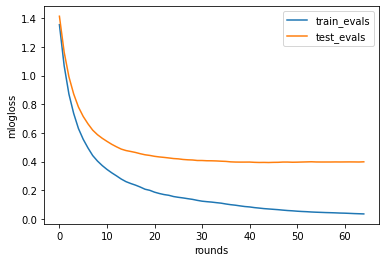

In [9]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('mlogloss')
plt.xlabel('rounds')

In [10]:
X = datasets.load_boston().data
y = datasets.load_boston().target
X_train, X_test, y_train, y_test = train_test_split(X, y)
xg2 = XGBRFRegressor(n_jobs=-1)
xg2.fit(X_train, y_train)
xg2.score(X_test, y_test) # R^2

0.92434202822794

In [11]:
xg2.feature_importances_

array([0.0248045 , 0.00527188, 0.04180854, 0.02656319, 0.0547178 ,
       0.21603072, 0.02016436, 0.11258519, 0.01589286, 0.03153985,
       0.05811853, 0.01952918, 0.37297344], dtype=float32)

In [12]:
xg2.predict(X_test)

array([23.272268, 45.114845, 33.48172 , 23.680424, 14.678944, 28.585484,
       20.520702, 27.210989, 17.997805, 40.209385, 20.988155, 23.60115 ,
       30.096811, 31.394938, 30.226665, 25.276602, 23.012274, 23.631115,
       20.66546 ,  8.88929 , 13.538998, 20.58521 , 20.64298 , 12.315752,
       20.931341, 22.1457  , 19.308025, 13.673458, 20.670303, 23.753593,
       20.910376, 47.03554 , 20.254128, 18.473848, 37.038086, 18.759222,
       13.302771, 15.109691, 19.53363 , 17.177155, 23.440994, 16.71447 ,
       21.087088, 12.040573, 20.849346, 14.570631, 34.53967 , 20.22602 ,
       23.781883, 21.366497,  9.157658, 41.270653, 23.829203, 15.237023,
       13.497606,  9.945608, 18.821943, 19.472696, 15.974691, 17.726364,
       20.494658, 12.125123, 22.646658, 25.970833, 20.089855, 20.82742 ,
       23.820608, 15.898731, 31.343962, 20.254738, 19.55086 , 38.631676,
       32.26865 , 23.707577, 11.639952, 26.295214, 22.063627, 36.35311 ,
       20.548489, 20.812004, 47.70728 , 16.044353, 